In [1]:
import os

os.environ['MAC'] = 'True'
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from common import get_data, handle_row_min_avg, handle_row_by_batch, handle_row_random_batch, handle_row_random_batch_offset, TRAIN_COLOR, ANSWER_COLOR, IMAGE_PADDING, draw_rectangle
from draw import draw_rectangles
import math

In [3]:
answers_data = pd.read_csv('minmax.csv')
train_data = pd.read_csv('train_data.csv')
answers_id = np.asarray(answers_data.itemId)

In [4]:
train_data[:3]

userId  itemId  Xmin  Ymin  Xmax  Ymax
0    1164    6132    62   656   276   803
1    1399    6132   184   662   235   740
2    1694    6132    63   648   272   830

In [5]:
answers_data[["itemId","Xmin_true","Ymin_true","Xmax_true","Ymax_true","Xdistance","Ydistance"]][:3]


itemId  Xmin_true  Ymin_true  Xmax_true  Ymax_true  Xdistance  Ydistance
0       5        198        827        649       1340       92.5      -39.0
1      10         26        605        433        847      -20.0       17.5
2      13        233        698        622        920       94.0       18.5

In [6]:
train_test = [
    [1,2,3,4,5,6],
    [7,8,9,10,11,12],
    [2,4,5,6,7,8],
    [3,5,6,7,8,9],
]
answer_test = [[1,2,3,4,5]]

print(handle_row_by_batch(np.array(train_test), answer_test, 2))


[[1, 3, 4, 5, 6, 9, 10, 11, 12, 2, 3, 4, 5], [1, 5, 6, 7, 8, 6, 7, 8, 9, 2, 3, 4, 5]]


In [7]:
with open('testset.csv', 'w') as f:
    for i in answers_id:
        train, answer = get_data(i, train_data, answers_data)
        rows = handle_row_random_batch_offset(train, answer[["itemId","Xmin_true","Ymin_true","Xmax_true","Ymax_true","Xdistance","Ydistance"]], samples_count=5, premutations=30, randomize=5)
        
        for row in rows:
            f.write(",".join([str(x) for x in row]) + '\n')


In [8]:
a, b = get_data(i, train_data, answers_data)
a

userId  itemId  Xmin  Ymin  Xmax  Ymax
2795    1602   35962    79   447   586   902
2796    1698   35962   108   538   369   816
2797    1046   35962    84   527   394   854
2798     279   35962    60   524   467   907
2799     886   35962    57   555   458   899
2800    1408   35962    85   514   376   882

[5, 151, 914, 511, 1331, 360, 417, 150120, 198, 827, 649, 1340]
151 914 511 1331


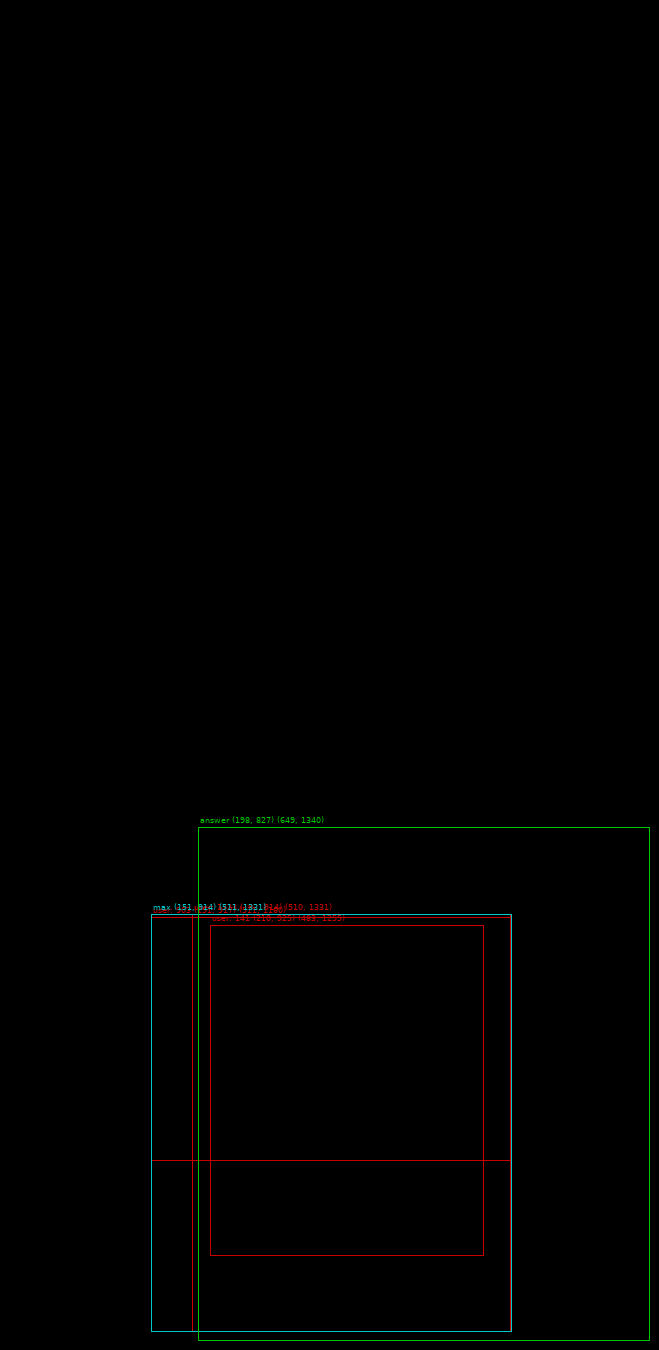

In [9]:
draw_rectangles(5, train_data, answers_data[["itemId","Xmin_true","Ymin_true","Xmax_true","Ymax_true"]])

In [10]:
w = 511 - 151
h = 1331 - 914
a = w * h

(w, h, a)

(360, 417, 150120)